# Airbnb Capstone Challenge

### Introduction

Welcome to the Airbnb Capstone Challenge Jupyter notebook. This notebook serves as a comprehensive exploration and analysis of Airbnb apartment listings in Manhattan. Our goal is to gain insights into the factors influencing rental prices and develop a predictive model to estimate the prices of these listings.

With the ever-growing popularity of short-term rentals, understanding the dynamics of the Airbnb market becomes crucial for both hosts and guests. By analyzing a rich dataset consisting of various attributes, we aim to uncover patterns, trends, and correlations that can guide pricing strategies and help potential guests make informed decisions.

### Objectives

The primary objectives of this notebook are:

1. Perform an exploratory data analysis (EDA) to understand the characteristics and distribution of Airbnb listings in Manhattan.
2. Identify key factors influencing rental prices and gain insights into their impact on pricing decisions.
3. Develop a price prediction model using available variables, allowing hosts to estimate rental prices for their properties accurately.

### Dataset

The dataset used in this analysis contains a wealth of information about Airbnb listings in Manhattan. It includes the following attributes:

* id: A unique identifier for each listing.
* name: The title or name of the listing.
* host_id: A unique identifier for each host.
* neighbourhood_group: The larger administrative area where the listing is located.
* neighbourhood: The specific neighborhood where the listing is situated.
* latitude: The latitude coordinate of the listing's location.
* longitude: The longitude coordinate of the listing's location.
* room_type: The type of room or space being listed (e.g., entire home/apartment, private room, shared room).
* price: The price per night for renting the listing.
* minimum_nights: The minimum number of nights required for booking the listing.
* number_of_reviews: The total number of reviews received for the listing.
* last_review: The date of the last review received for the listing.
* reviews_per_month: The average number of reviews received per month for the listing.
* calculated_host_listings_count: The count of listings managed by a host, indicating experience and professionalism in short-term rental management.

### Notebook Structure

This notebook is structured as follows:

1. Understanding the dataset: This section provides an overview of the dataset, describing the variables and their definitions.
2. Data cleaning and preprocessing: We will perform necessary data cleaning steps to ensure the dataset's quality and prepare it for analysis.
3. Exploratory Data Analysis (EDA): Using various visualizations and statistical techniques, we will uncover insights about the Airbnb market in Manhattan, including price distribution, popular neighborhoods, and correlations between variables.
4. Feature engineering: We will derive additional features from the existing ones to enhance our price prediction model.
5. Price prediction: Utilizing machine learning algorithms, we will develop a predictive model to estimate rental prices based on the available dataset.
6. Conclusion: We will summarize our findings, discuss the implications, and suggest potential areas for future research.

Get ready to delve into the captivating world of Manhattan's Airbnb market and uncover the secrets behind rental pricing!

In [1]:
# required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# create palette
palette = sns.color_palette(["#58508d", "#ff6361", "#ffa600", "#bc5090", "#003f5c"])  
sns.set_palette(palette)  

# load dataset
df = pd.read_csv('data/AB_NYC_2019.csv')

In [2]:
df. columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Understanding the dataset

In [3]:
df.shape

(48895, 16)

The dataset contains 488895 rows and 16 columns.

Let's check the first rows. 

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# unique neighbourhoods

df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [7]:
# unique neighbourhood_group

df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

# Data cleaning

In this part a data cleaning step is performed. From top to bottom these are the steps performed to obtain a clean dataset:

1. Delete null values. 
2. 
3. 

To accomplish the first point, differente techniques can be applied: 
* Remove rows that contain at least one NaN value.
* Remove the column that contains at least one NaN value.
* Fill NaN values based on some criteria:
    * Impute values based on the mean/median/mode of the variable.
    * Interpolation methods.
    * Methods based on regression, classification, etc.



In [8]:
# Percentage of NaN values over the number of records

round(df.isna().sum()/df.shape[0]*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In our case, it may be of interest to analyze the number of reviews for the property. So, we remove the columns that have NaN values (as they don't contribute anything) except for reviews_per_month. In this case, we simply delete the rows that contain NaN values.

In [9]:
# Remove the columns that contain NaN values and those that are not of interest to us

df.drop(['name','id','host_name','last_review','calculated_host_listings_count'], axis=1, inplace=True)

In [10]:
# check the result

df.isna().sum()

host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

In [11]:
# drop rows with at leat one nan value

df.dropna(inplace=True)

In [12]:
# chech the result

df.isna().sum()

host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

In [13]:
df.shape

(38843, 11)

* Original dataset: ~41k rows. 

* Dataset after NaN cleaning: ~39k rows. 

In [14]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,114.882888
std,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,129.543636
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,0.000000
25%,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


We need to determine if the metrics can provide insight into anomalous data. In this case:

* The column "availability_365" contains a significant amount of anomalous data. We can exclude it from consideration.
* The maximum value of "price" does not seem to be a valid value.
* Similarly, the maximum value of "minimum_night" appears to be invalid.

In [15]:
# drop availability_365 column

df.drop('availability_365', axis=1, inplace=True)

### Detection of anomalous data in the column "price"

In [16]:
# take a look of the highest value

df[df['price']==10000]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
9151,20582832,Queens,Astoria,40.7681,-73.91651,Private room,10000,100,2,0.04
17692,5143901,Brooklyn,Greenpoint,40.7326,-73.95739,Entire home/apt,10000,5,5,0.16


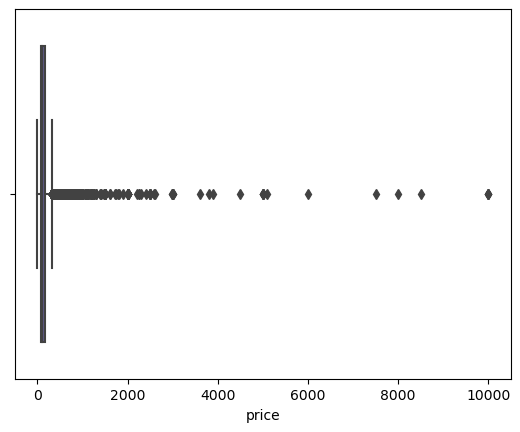

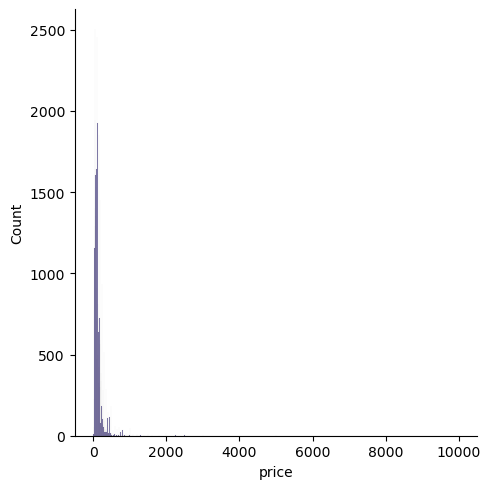

In [17]:
# price distribution

sns.boxplot(x='price', data=df)
plt.show();
sns.displot(df, x='price')
plt.show();

We could keep the entire dataset and perform a comprehensive analysis, including extreme values. However, to have a more "homogeneous" dataset, we will only consider values between the 5th and 95th percentiles based on price.

In [18]:
# calculate the 5 and 95 percentiles.

per5 = np.percentile(df["price"], 5)
per95 = np.percentile(df["price"], 95)

In [19]:
# we can delete all the data out of the inteval [per5, per95]
df = df[(df["price"] >= per5) & (df["price"] <= per95)]

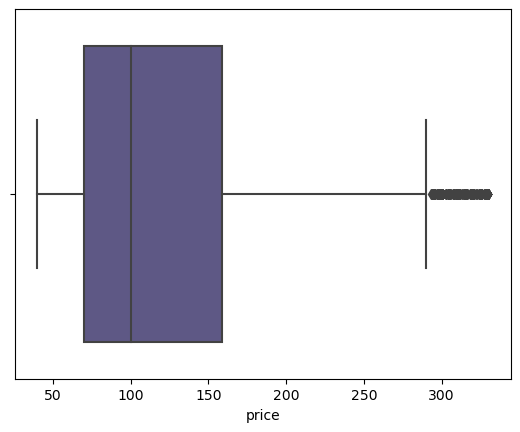

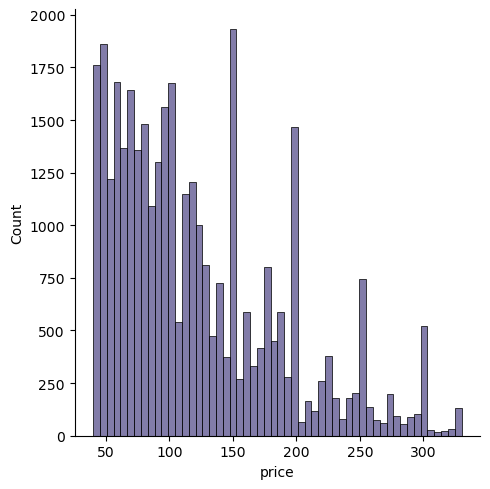

In [20]:
# price distribution

sns.boxplot(x="price", data=df)
plt.show();
sns.displot(df, x="price")
plt.show();

In the first plot we can see some outliers that can be deleted. 

In [21]:
# We keep the data whose price falls within the 90th percentile

per90 = np.percentile(df["price"], 90)
df = df[df["price"] <= per90]

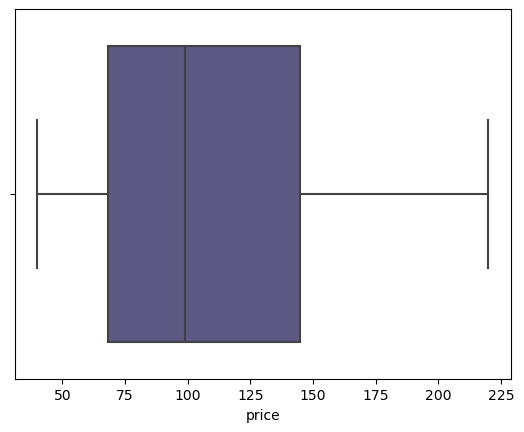

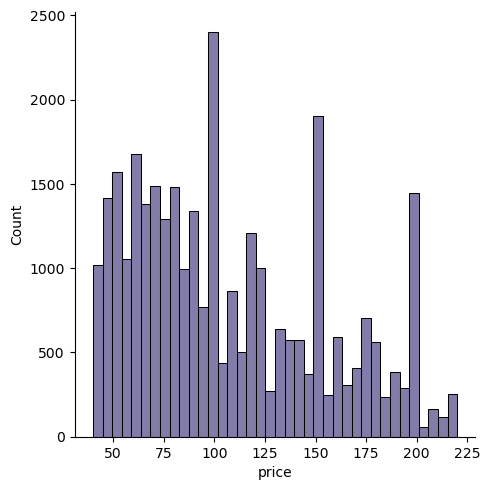

In [22]:
sns.boxplot(x="price", data=df)
plt.show();
sns.displot(df, x="price")
plt.show();

The distribution is decreasing in price. The peaks at 100, 150, and 200 euros are noticeable. Perhaps the owners tend to round the prices?

In [23]:
df.shape

(31994, 10)

* Original dataset: ~41k records.
* Dataset after NaN cleaning: ~39k records.
* Dataset after price-based cleaning: ~32k records.

In [24]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,3.199400e+04,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000
mean,6.127962e+07,40.727987,-73.948904,106.972432,5.833719,30.630149,1.386301
std,7.333588e+07,0.056061,0.046412,47.403076,18.120204,49.861039,1.708170
min,2.438000e+03,40.506410,-74.244420,40.000000,1.000000,1.000000,0.010000
25%,6.885250e+06,40.687623,-73.979590,68.000000,1.000000,3.000000,0.190000
50%,2.682299e+07,40.719930,-73.952900,99.000000,2.000000,10.000000,0.710000
75%,9.292637e+07,40.764088,-73.932862,145.000000,4.000000,35.000000,2.050000
max,2.738417e+08,40.913060,-73.712990,220.000000,1250.000000,629.000000,58.500000


### Detection of anomalous data in the column "minimum nights"

The minimum value of the "minimum nights" is correct. There should not be any data with this variable equal to 0. If there are such cases, we would need to proceed as follows:

* Identify and isolate these cases for separate analysis. It could be the default value provided by Airbnb to its customers.
* Remove the records containing this value.
* A quick technique to fill in the missing data would be to replace 0 with 1.

On the other hand, the maximum value of the "minimum nights" (1250) does not seem to fit.

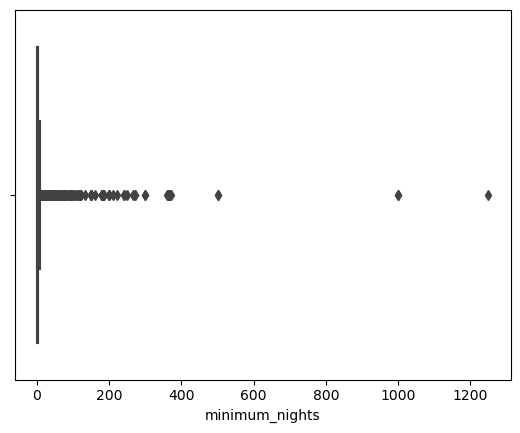

In [25]:
# show distribution

sns.boxplot(x="minimum_nights", data=df)
plt.show();

In [26]:
# percentiles 5, 90 y 95

per5 = np.percentile(df["minimum_nights"], 5)
per90 = np.percentile(df["minimum_nights"], 90)
per95 = np.percentile(df["minimum_nights"], 95)
per5, per90, per95

(1.0, 13.0, 30.0)

It seems quite reasonable for the minimum number of nights to be 1 and the maximum to be 30 (one month). However, let's see how many values would be excluded if we disregard the top 5%.

In [27]:
# Number of records that are in the top 5%.

df[df['minimum_nights'] > per95].shape

(349, 10)

It is not catastrophic to remove 349 records from a dataset of approximately 32k records.

In [28]:
# we keep data between 5% and 95%

df = df[(df["minimum_nights"] >= per5) & (df["minimum_nights"] <= per95)]

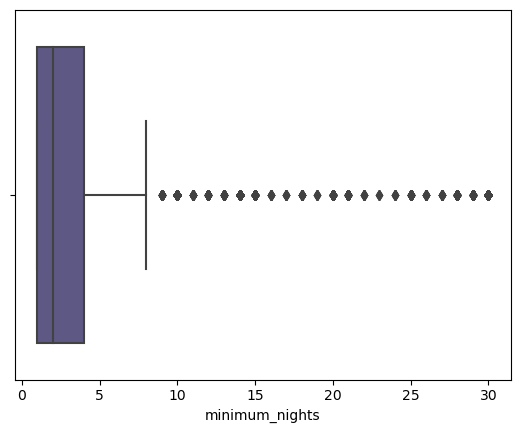

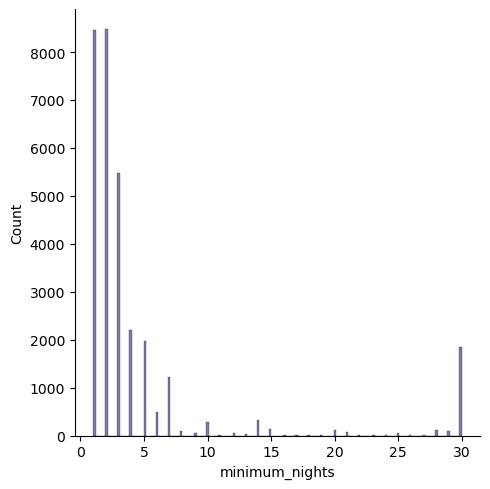

In [29]:
sns.boxplot(x="minimum_nights", data=df)
plt.show();
sns.displot(df, x="minimum_nights")
plt.show();

In [30]:
df.shape

(31645, 10)

In this last graph, we can see that there are very few values between 7 nights and 30 nights. These data appear to be coherent based on our experience: rentals for a few days or for more than a week. And then, there is a jump to a minimum of 30 days for monthly rentals.

### Summary of the performed cleaning:

   1. Detection and handling of NaN values.
   
   2. Selection of variables of interest.
   
   3. Removal of the "availability_365" column due to having too many inconsistent data points.
   
   4. Analysis of outliers in price and minimum number of nights.
   
   5. We went from an original dataset of 48,895 records to one with 31,645 records.

# Analysis

we will focus on analyzing how the characteristics of the accommodation can affect its price. Specifically, we will examine the room type and the location of the accommodation.

## Room type

In [31]:
# number of rooms per room type

df[['room_type', 'host_id']].groupby('room_type').count()

,host_id
room_type,
Entire home/apt,15125
Private room,16033
Shared room,487


In [32]:
# average price by room type

df[['room_type', 'price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,138.148826
Private room,78.525603
Shared room,70.726899


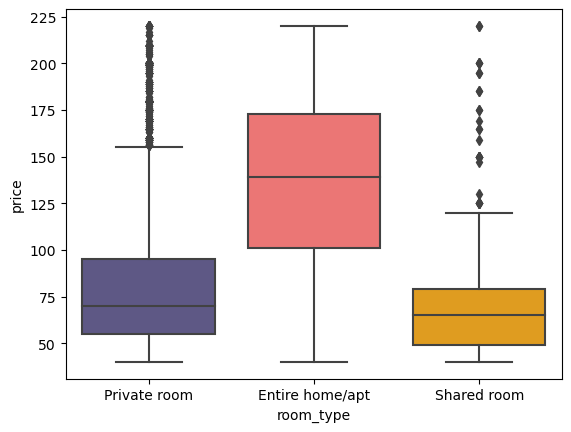

In [33]:
# price distribution

sns.boxplot(data=df, x="room_type", y="price")
plt.show()

#### Conclusions

* The majority of owners offer private rooms or entire apartments, with very few shared rooms available.

* Price analysis by room type indicates that, in general, entire apartments are more expensive than private rooms and shared rooms.

* It is interesting to note that shared rooms do not differ significantly from private rooms in terms of price.

## Neigbourhoods

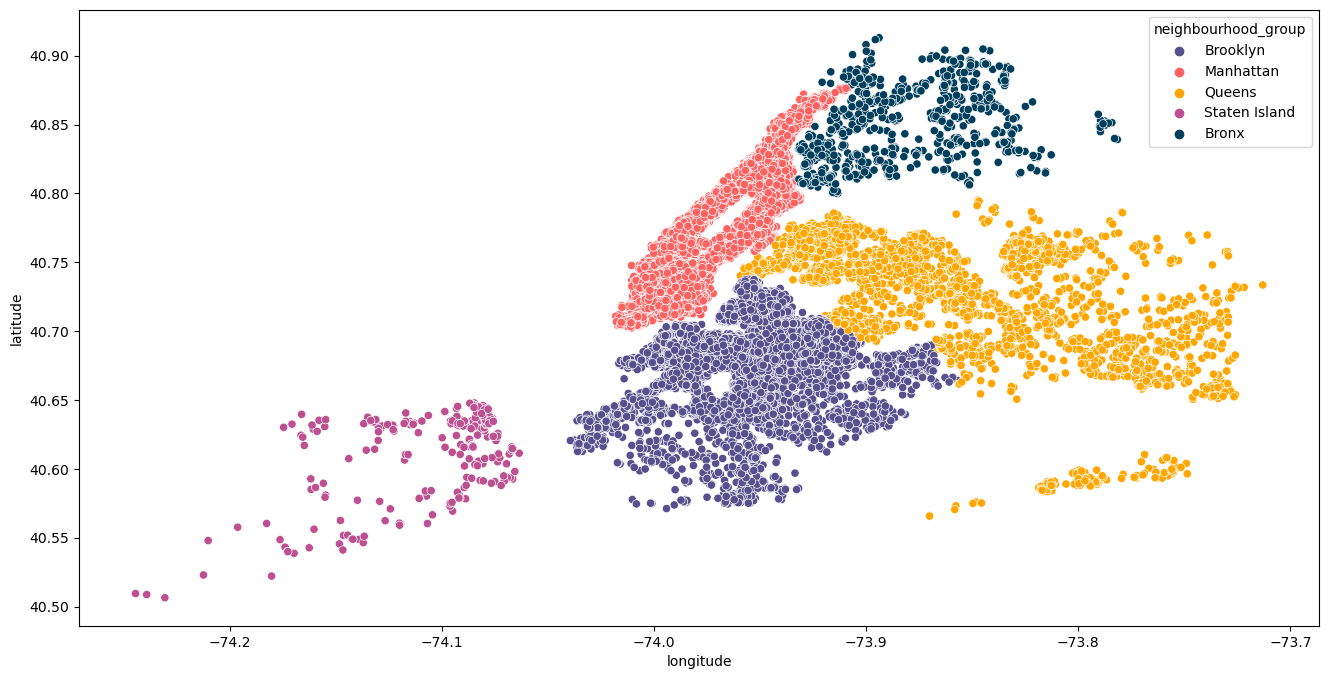

In [34]:
# show th elocation of the properties

plt.subplots(figsize=(16,8))
sns.scatterplot(y=df["latitude"],x=df["longitude"],hue=df["neighbourhood_group"])
plt.show();

In [35]:
# number of properties by neighbourhood_group

df[['neighbourhood_group', 'host_id']].groupby('neighbourhood_group').count()

,host_id
neighbourhood_group,
Bronx,710
Brooklyn,14058
Manhattan,12653
Queens,3972
Staten Island,252


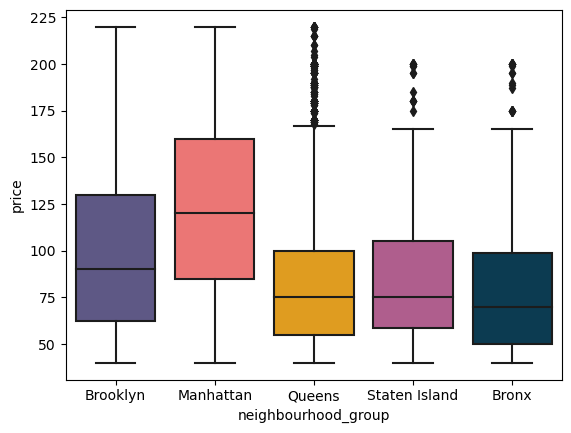

In [36]:
# price distribution by neighbourhood_group

sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.show()

#### Conclusions

* In terms of the number of accommodations offered, the boroughs are ranked from highest to lowest as follows: Brooklyn, Manhattan, Queens, Bronx, and Staten Island. It would be interesting to gather census data to obtain a metric such as the number of Airbnb accommodations per capita.

* Regarding prices, Manhattan is the borough with, on average, the highest-priced apartments, followed by Brooklyn. Queens, Staten Island, and the Bronx have relatively similar prices. However, the outliers in the latter three boroughs are noteworthy.

## Neighborhoods and Room Types

In this case, we will try to draw conclusions by combining these two variables.

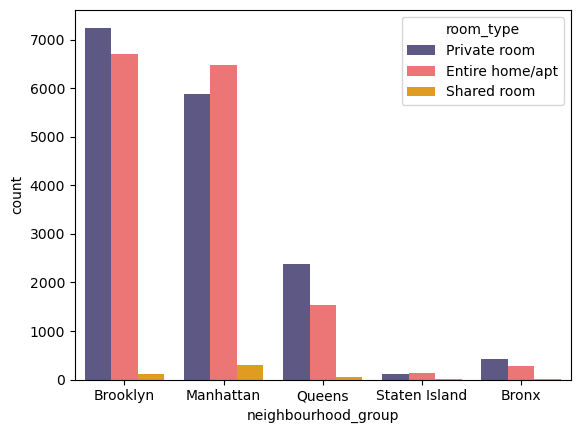

In [37]:
sns.countplot(data=df,x='neighbourhood_group', hue='room_type')
plt.show();

In [38]:
# average price by room type in eah neighbourhood group 

df[['room_type', 'price', 'neighbourhood_group']].groupby(['neighbourhood_group', 'room_type']).mean()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  104.391304
                    Private room      61.980861
                    Shared room       59.812500
Brooklyn            Entire home/apt  132.109354
                    Private room      71.411481
                    Shared room       63.888889
Manhattan           Entire home/apt  151.298749
                    Private room      93.654474
                    Shared room       76.097315
Queens              Entire home/apt  117.874755
                    Private room      66.330808
                    Shared room       58.492063
Staten Island       Entire home/apt  106.588235
                    Private room      65.535088
                    Shared room      112.500000

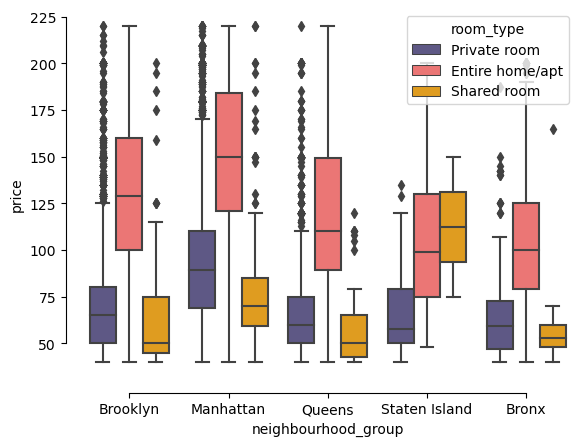

In [39]:
# we also can visualize this relation

sns.boxplot(x="neighbourhood_group", y="price", hue='room_type',
            data=df)
sns.despine(offset=10, trim=True)

The case of Staten Island is particularly intriguing because it is the only borough where the price distribution by room type does not follow what our intuition would lead us to expect. Additionally, it completely differs from the other distributions. If we examine the graph that shows the number of records by room type and borough, we can see that there are very few shared rooms in Staten Island. Therefore, it would be interesting to focus on this borough to investigate why it behaves differently in terms of room types and prices. 

In [40]:
# There are only two listings in Staten Island with shared rooms. 

df[(df['neighbourhood_group']=='Staten Island') & (df['room_type']=='Shared room')]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
35265,50756378,Staten Island,Clifton,40.61672,-74.08550,Shared room,75,2,1,0.10
36327,50756378,Staten Island,Clifton,40.61595,-74.08535,Shared room,150,2,2,0.22


## Concluding the Analysis

At this stage, we have completed the analysis phase, uncovering valuable insights about Airbnb apartments in Manhattan. However, it is important to acknowledge that the analysis opens up a realm of intriguing questions, with each question branching into its own path of exploration, depending on the analyst's interests and objectives.

The questions posed earlier are just a starting point, offering a glimpse into the potential avenues for further investigation. The beauty of data analysis lies in the boundless possibilities it presents, encouraging analysts to delve deeper, uncover hidden patterns, and seek answers to their own unique inquiries.

Let us embrace the multitude of questions that may arise and embark on a journey to unravel the complexities of the Airbnb apartment market in Manhattan.



* Where are the most expensive accommodations located? What are their characteristics? Similarly, what about the least expensive accommodations?

* Integrating this dataset with rental data:

    * Do neighborhoods with higher rental rates have more tourist accommodations?

    * Do neighborhoods with higher rental rates have higher-priced tourist accommodations?

* Considering the average price per neighborhood, which accommodations should we choose to stay within 10% above that price?

* Cross-referencing with census data: How many accommodations are available per resident in each neighborhood?

* Combining with tourism data to identify the most visited areas. In the case of New York, it is evident that Manhattan is a popular zone. However, are there other neighborhoods with high tourist interest?

* Obtaining the geographical locations of major tourist attractions and deriving a metric indicating the proximity of accommodations to those attractions.

* These questions serve as a starting point for further exploration and deeper understanding of the Airbnb apartment market.

# Price Prediction

In this section, we will focus on predicting the prices of Airbnb apartments using two different models: a baseline multivariate regression model and a random forest model. 

### Baseline Multivariate Regression Model

To begin, we will develop a baseline model based on multivariate regression. This model will incorporate various features of the apartments, such as location, room type, and other relevant factors, to predict the price. The baseline model serves as a reference point against which we can compare the performance of more advanced models.

### Random Forest Model

Next, we will introduce the random forest model, an ensemble learning method that combines multiple decision trees to make predictions. Unlike the multivariate regression model, which assumes a linear relationship between the features and the price, the random forest model is capable of capturing non-linear relationships and interactions among the features. This makes it a powerful tool for predicting prices in complex datasets like the Airbnb apartment dataset.

#### Benefits of Random Forest over Multivariate Regression

The random forest model offers several advantages over the multivariate regression model:

1. **Non-linearity**: Random forest can capture non-linear relationships between features and the target variable, allowing for more flexible and accurate predictions compared to the linear assumptions of multivariate regression.

2. **Robustness to Outliers**: Random forest models are less affected by outliers in the data, as they aggregate predictions from multiple decision trees. In contrast, outliers can significantly impact the coefficients and predictions of a multivariate regression model.

3. **Feature Importance**: Random forest models provide insights into feature importance, helping us identify the most influential factors in predicting apartment prices. This information can be valuable for understanding the market dynamics and making informed decisions.

By utilizing the random forest model, we aim to enhance the accuracy and predictive power of our price predictions for Airbnb apartments.

### Metrics for Model Evaluation
In order to assess the performance of our regression models, we will use the following metrics:

1. Coefficient of Determination (R2): This metric measures the proportion of variance in the target variable (price) that can be explained by the independent variables. A higher R2 value indicates a better fit of the model to the data.

2. Absolute Percentage Error (APE): APE calculates the absolute difference between the predicted price and the actual price, expressed as a percentage of the actual price. It provides an indication of the average prediction error in percentage terms.

3. Mean Absolute Percentage Error (MAPE): MAPE is the average of the absolute percentage errors across all predictions. It gives us a measure of the overall accuracy of the model's price predictions.

These metrics will help us evaluate the performance of the regression models and compare their predictive abilities. We will assess how well the models capture the variation in apartment prices and how accurate their predictions are relative to the actual prices.

In [41]:
# libraries

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [42]:
# We remove the columns that are not of interest to us

df.drop(['host_id', 'neighbourhood'], axis=1, inplace=True)

In [43]:
# We obtain dummy variables from the categorical variables.

variables_categoricas = ['neighbourhood_group','room_type']

for v in variables_categoricas:
    dummies = pd.get_dummies(df[v],prefix=v)
    df = pd.concat([df,dummies],axis=1)
    df.drop([v],axis=1,inplace=True)

df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,0,1,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,0,0,1,0,0,1,0,0
7,40.76489,-73.98493,79,2,430,3.47,0,0,1,0,0,0,1,0


In [44]:
# Function to calculate the MAPE.

def mape(y_true, y_pred):
    """
    Calculates Mean Absolute Percentage Error between y_true and y_pred.
    
    Args:
    y_true: numpy array of actual values
    y_pred: numpy array of predicted values
    
    Returns:
    mape: Mean Absolute Percentage Error
    """
    mape = round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)
    return mape

## Baseline Multivariate Regression Model

In [45]:
# correlations

df.corr()['price']

latitude                             0.038386
longitude                           -0.291197
price                                1.000000
minimum_nights                       0.063977
number_of_reviews                   -0.001693
reviews_per_month                   -0.051573
neighbourhood_group_Bronx           -0.090994
neighbourhood_group_Brooklyn        -0.124575
neighbourhood_group_Manhattan        0.272722
neighbourhood_group_Queens          -0.166188
neighbourhood_group_Staten Island   -0.035592
room_type_Entire home/apt            0.630421
room_type_Private room              -0.606384
room_type_Shared room               -0.095367
Name: price, dtype: float64

In [46]:
# get the target (price) and the independent variables
x = df.drop(['price'], axis=1)
y = df['price']

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(22151, 13)
(22151,)
(9494, 13)
(9494,)


In [47]:
# linear regression

linear_model_sk = LinearRegression()  
linear_model_sk.fit(train_x, train_y)
linear_model_sk.score(test_x, test_y)   # We obtain the coefficient of determination.

0.4908131839834309

The R2 value is very low, indicating that there is no strong linear relationship between the variables and the price. As we observed during the calculation of correlations, there was not much linear correlation present.

In [48]:
# We obtain a table of actual values, predictions, and APE (Absolute Percentage Error)

pred_y = linear_model_sk.predict(test_x)
ape = 100* (pred_y - test_y)/test_y
df_out_linear = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y, 'APE (%)': ape})
df_out_linear.head(30)

,Actual,Predicted,APE (%)
2524,110,130.074321,18.249382
26679,185,130.388507,-29.519726
5964,88,125.023718,42.072406
25133,82,142.921102,74.294027
28830,165,142.604320,-13.573139
43513,69,85.715472,24.225321
21944,65,37.117938,-42.895480
39462,175,161.128730,-7.926440
7614,70,102.979219,47.113170
18481,125,138.123375,10.498700


In [49]:
# We calculate the MAPE (Mean Absolute Percentage Error), which tells us the average percentage of error we are making. 

mape(df_out_linear['Actual'], df_out_linear['Predicted'])

27.82

## Random forest

In [50]:
# creamos el regresor y ajustamos el dataset de training

rf_regressor = RandomForestRegressor(n_estimators=100,random_state=0)
rf_regressor.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

The parameter `rf_regressor` in the code snippet represents an instance of the Random Forest Regressor model. Let's break down the parameters used to initialize this model:

- `n_estimators`: This parameter specifies the number of decision trees to be included in the random forest. In this case, `n_estimators=100` means that the random forest will consist of 100 individual decision trees.

- `random_state`: This parameter sets the random seed for reproducibility. By setting `random_state=0`, the same random sequence will be generated each time the model is trained, ensuring consistent results.

The Random Forest Regressor is an ensemble learning algorithm that combines multiple decision trees to make predictions. Each decision tree is built using a subset of the training data and a random subset of features. The final prediction is obtained by aggregating the predictions of all individual trees, which helps to reduce overfitting and improve the model's generalization performance.

By using a large number of decision trees (100 in this case), the random forest model can capture complex patterns and interactions in the data, making it a powerful tool for regression tasks. The random forest algorithm is known for its ability to handle non-linear relationships, handle a high number of features, and provide robust predictions even in the presence of noisy or correlated data.

Overall, the Random Forest Regressor with 100 estimators and a random state of 0 offers a good balance between model complexity and performance.

In [51]:
# get the score of the training set

rf_regressor.score(train_x,train_y)

0.9352966131890172

In [52]:
# get the score of the testing set

rf_regressor.score(test_x,test_y)

0.5411333447957367

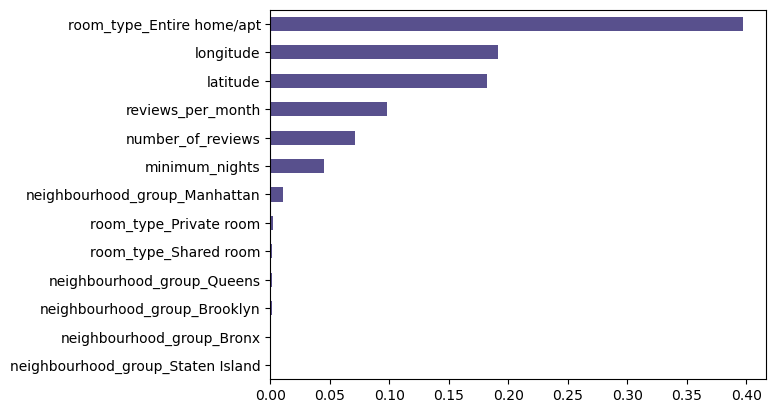

In [53]:
# Let's see which attributes have the most impact on the accommodation price.

feature_importance = pd.Series(rf_regressor.feature_importances_,index=x.columns)
feature_importance = feature_importance.sort_values()
feature_importance.plot(kind='barh');

In [54]:
# We obtain a table of actual values, predictions, and APE (Absolute Percentage Error).

pred_y = rf_regressor.predict(test_x)   
ape = 100* (pred_y - test_y)/test_y
df_out_rf = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y, 'APE (%)': ape})
df_out_rf.head(30)

,Valor real,Predicción,APE (%)
2524,110,111.41,1.281818
26679,185,119.76,-35.264865
5964,88,130.86,48.704545
25133,82,130.84,59.560976
28830,165,117.13,-29.012121
43513,69,75.11,8.855072
21944,65,54.37,-16.353846
39462,175,143.72,-17.874286
7614,70,97.14,38.771429
18481,125,113.29,-9.368000


In [55]:
# MAPE

mape(df_out_rf['Actual'], df_out_rf['Predicted'])

25.13

In [69]:
print('Prediction with errors <10%: ' + str(round(100*df_out_rf[df_out_rf['APE (%)'] <= 10].shape[0]/df_out_rf.shape[0],2)))
print('Prediction with errors between 10% and 20%: ' + str(round(100*df_out_rf[(df_out_rf['APE (%)'] >= 10)&(df_out_rf['APE (%)'] <= 20)].shape[0]/df_out_rf.shape[0],2)))
print('Prediction with errors > 20%: ' + str(round(100*df_out_rf[df_out_rf['APE (%)'] > 20].shape[0]/df_out_rf.shape[0],2)))

Prediction with errors <10%: 57.51
Prediction with errors between 10% and 20%: 10.85
Prediction with errors > 20%: 31.67


# Conclusions

Overall, the predictions generated by the random forest model exhibit reasonably accurate results, with the majority of predictions having errors below 20%. This indicates that the model is generally effective in capturing the underlying patterns and trends in the Airbnb apartment dataset.

The fact that the majority of predictions fall within an acceptable range of error is encouraging, as it suggests that the model is capable of providing valuable insights into the pricing dynamics of Airbnb apartments. However, it is important to note that there may still be some predictions with higher errors, indicating areas where the model may have difficulty capturing the complexity of certain instances.

To further improve the prediction accuracy, it would be beneficial to explore additional features and data sources that may provide more nuanced information about the apartments, neighborhoods, and market factors. Incorporating variables such as property amenities, proximity to tourist attractions, or local events could potentially enhance the model's predictive power and reduce the occurrence of high-error predictions.

By continuously refining the model and integrating relevant data, it is possible to achieve even better prediction performance and gain deeper insights into the factors that drive Airbnb apartment prices.